In [ ]:
import os
print(os.getcwd())

In [23]:
import os
import sys
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

In [3]:
chemin_fichier = "/home/rmoine/Documents/PIRfolder/IA/".split("/")
sys.path.append("/".join(chemin_fichier))
sys.path.append("/".join(chemin_fichier+["enet"]))
sys.path.append("/".join(chemin_fichier[:-1]))
sys.path.append("/".join(chemin_fichier[:-2]))

from IA.enet.data.Nuscene_dataset_segmentation import Nuscene_dataset_segmentation
import tensorflow as tf

dataset = Nuscene_dataset_segmentation(img_width=1600,limit_nb_tr=7500,
                                       taille_mini_px=0,
                                        batch_size=10,with_weights="False",
                                        summary_writer=None,augmentation="f")

dataset_tr = tf.data.Dataset.from_generator(dataset.getNextBatchTr,
                                            output_types=(tf.float32, tf.float32),
                                            output_shapes=(tf.TensorShape([None, None, None, None]),
                                                           tf.TensorShape([None, None, None,None])))\
    .repeat(1)

dataset_upper = super(type(dataset),dataset)

INIT
BEFORE
(900, 1600, 3) [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2.]


In [5]:
for index in range(200):
    image = dataset.getImage(index)
    label = dataset.getLabels(index)
    labeleff = dataset_upper.getLabels(index)
    print(index,image.shape,labeleff)

0 (900, 1600, 3) [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2.]
1 (900, 1600, 3) [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
2 (900, 1600, 3) [0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 4.]
3 (900, 1600, 3) [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2.]
4 (900, 1600, 3) [0. 0. 0. 3. 0. 0. 0. 0. 0. 0. 3. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 3.]
5 (900, 1600, 3) [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 4.]
6 (900, 1600, 3) [0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 3.]
7 (900, 1600, 3) [0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 4.]
8 (900, 1600, 3) [0. 0. 0. 3. 0. 0. 0. 0. 0. 0. 3. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 2.]
9 (900, 1600, 3) [0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 4.]
10 (900, 1600, 3) [0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 2.]
11 (900, 1600, 3) [0. 0. 0. 2. 

In [44]:
index = 199
image = dataset.getImage(index)
label = dataset.getLabels(index)
labeleff = dataset_upper.getLabels(index)
print(index,image.shape,labeleff)

199 (900, 1600, 3) [0. 4. 0. 0. 0. 0. 0. 0. 8. 0. 0. 0. 0. 0. 0. 0. 3. 1. 0. 0. 0. 0. 1.]


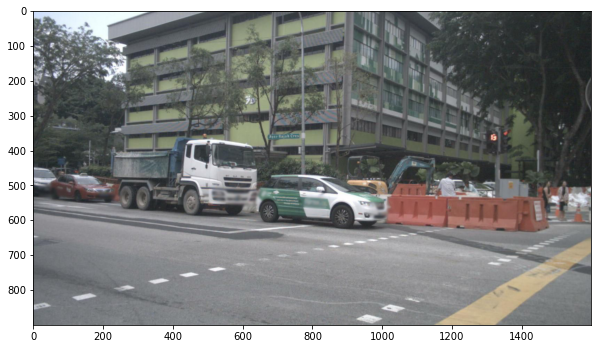

In [45]:
plt.figure(figsize=(10,10))
plt.imshow(image)

4.0


<Figure size 432x288 with 0 Axes>

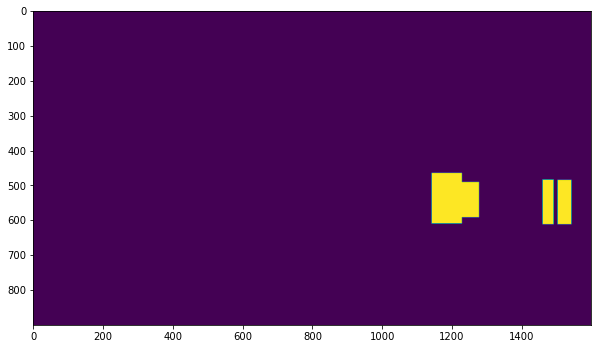

In [46]:
channel = 1
print(labeleff[channel])
plt.clf()
plt.figure(figsize=(10,10))
plt.imshow(label[:,:,channel])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[[1504  484]]

 [[1504  610]]

 [[1543  610]]

 [[1543  484]]]
2


<Figure size 432x288 with 0 Axes>

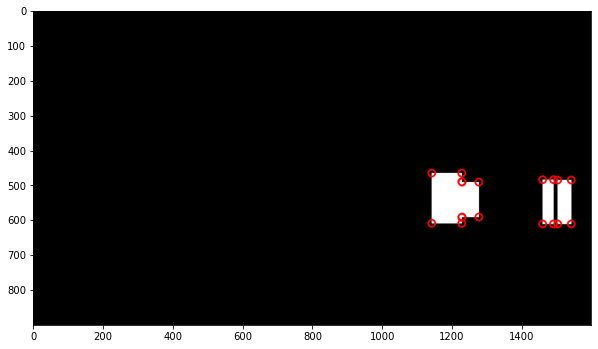

In [65]:
i_class = channel
_, img_threshold = cv2.threshold(label[ :, :, i_class],
                                 0.9,
                                 maxval=1.,
                                 type=cv2.THRESH_BINARY)
img_threshold = (img_threshold * 255).astype(np.uint8)
plt.clf()
plt.figure(figsize=(10,10))
plt.imshow(img_threshold)
contours = np.array(cv2.findContours(img_threshold, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE))
print(contours[0][0])
img1 = np.stack((label[ :, :, i_class],)*3,axis=-1).copy()
for contour in contours[0]:
    contours_img = np.array(contour).reshape(-1,2)

    for (x, y) in contours_img:
        cv2.circle(img1, (x, y), 10, (0, 0, 255), 3)
    plt.imshow(img1[:,:,::-1])

nb_contours = str(len(contours))
print(nb_contours)

In [61]:
print(label[ :, :, i_class].shape)
np.stack((label[ :, :, i_class],)*3,axis=-1).shape

(900, 1600)


(900, 1600, 3)